# Mountain Car

- Popular dynamic system for AI methods testing (see gym.openai.com)

<IPython.core.display.Javascript object>


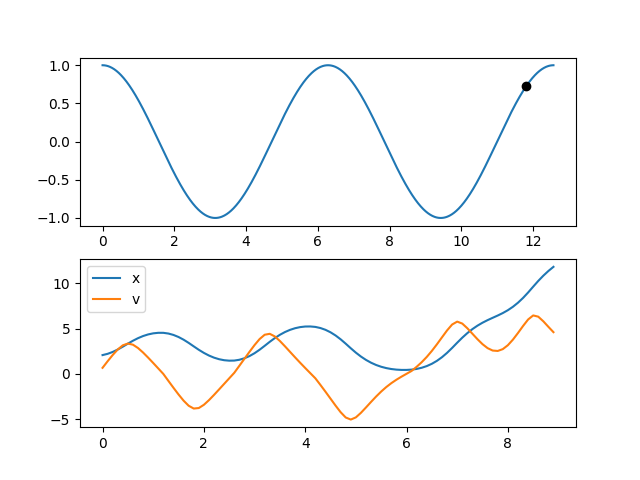

In [2]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 17 23:11:19 2017

@author: Stanislav Vechet
"""
%matplotlib notebook
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

#==============================================================================
# simulation setup
g = 9.81

time = 9.0                             # seconds
dt = 0.1                                # time step [s]
steps = int(time / dt)

fce_y = lambda x: np.cos(x)
fce_y_ = lambda x: -np.sin(x)
#==============================================================================
# model parameters
m = 1.0                                 # kg
F_zero = 0.0#4.2                        # [N] - constant force
friction = 0.1                          # friction

#==============================================================================
# simulation
q = 2.0                                 # initial value of x
q_dot = 0                               # initial value of v
q_2dot = 0                              # acceleration
t, a, v, x, f = [], [], [], [], []      # prepare lists for storing values

# prepare plot
fig = plt.figure()
ax = fig.subplots(2)
plt.ion()                               # enable interactive plotting
fig.show()
fig.canvas.draw()

for i in range(steps):
    """
    Runge-Kutta first order -> Euler
    """
    fi = np.arctan(fce_y_(q))
    F_zero = 1.5 * np.sign(q_dot)       # action
    #==========================================================================
    # integration    
    q_2dot = (F_zero / m) - g*np.sin(fi) - np.sign(q_dot)*g*np.cos(fi)*friction
    q_dot = q_dot + q_2dot * dt
    q = q + q_dot * dt
    #==========================================================================
    # log simulation data    
    a.append(q_2dot)
    v.append(q_dot)
    x.append(q)
    t.append(dt*i)
    #==========================================================================
    # plotting results
    xx = np.linspace(0,4*np.pi,1000)
    y = fce_y(x)                       # create terrain
    ax[0].clear()
    ax[0].plot(xx, fce_y(xx))            # plot terrain
    ax[0].plot(q, fce_y(q), 'ko')        # plot car
    ax[1].clear()
    ax[1].plot(t, x)
    ax[1].plot(t, v)
    ax[1].legend(['x','v'])
    
    fig.canvas.draw()
    
    plt.pause(0.001)